HW1 solutions generated by Wilson Raney (wraney@nd.edu)

**Problem 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os

In [2]:
V = 4           # liters
Q = 0.5         # liters/hour
MIC = 5         # mg/liter
MBC = 8         # mg/liter

C_initial = 0  # mg/liter

dt = 1          # hour
Udose = 64      # mg

In [3]:
def u(t):
    return Udose/dt if t % tdose <= dt else 0

def deriv(t, C):
    return u(t)/V - (Q/V)*C

In [4]:
def plotConcentration(soln):
    fig, ax = plt.subplots(1, 1)
    ax.plot(soln.t, soln.y[0])
    ax.set_xlim(0, max(soln.t))
    ax.plot(ax.get_xlim(), [MIC, MIC], 'g--', ax.get_xlim(), [MBC, MBC], 'r--')
    ax.set_ylim(0, 25)
    ax.legend(['Antibiotic Concentration','MIC','MBC'])
    ax.set_xlabel('Time [hrs]')
    ax.set_ylabel('Concentration [mg/liter]')
    ax.set_title('One Compartment Model with Known Initial Condition');
    return ax

The largest value of tdose to maintain the plasma concentration above the MBC level for at least 96 hours is: 6.05  hours.


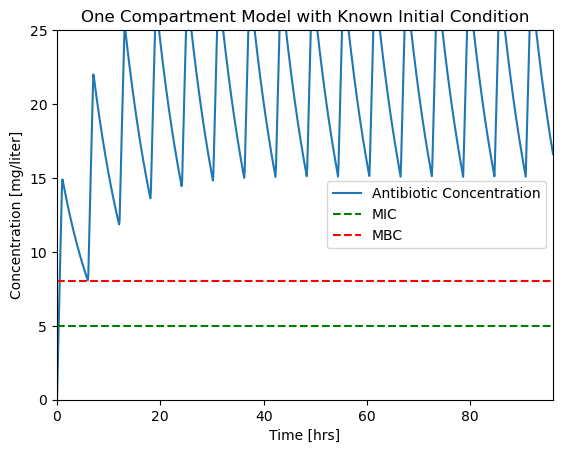

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os

# parameter values
V = 4           # liters
Q = 0.5         # liters/hour
MIC = 5         # mg/liter
MBC = 8         # mg/liter
C_initial = 0   # mg/liter

# differential equation
def deriv(t, C):
    return u(t)/V - (Q/V)*C

# input parameter values
dt = 1           # length of administration for a single dose
tdose = 1        # time between doses. use this value as an initial guess
Udose = 64       # mg

flag = False

while flag == False:

  def u(t):
    return Udose/dt if t % tdose <= dt else 0

  # events
  def cross_mbc(t, y):
    return y[0] - MBC
  cross_mbc.direction = -1

  def cross_mic(t, y):
    return y[0] - MIC
  cross_mic.direction = -1

  events = [cross_mbc]

  # specify time span and evaluation points
  t_span = [0, 96]
  t_eval = np.linspace(0, 96, 1000)

  # initial conditions
  C_initial = 0
  IC = [C_initial]

  #compute solution
  soln = solve_ivp(deriv, t_span, IC, events=events, t_eval=t_eval, max_step=0.1)
  
  #if the guess value produces no events, increase tdose
  if len(soln.y_events[0]) == 0:
    tdose += 0.01

  #if the guess value produces an event for MBC, we have reached the target tdose
  #however, we don't want a tdose that produces an event, so our target will be
  #the previous iteration we performed
  else:
    flag = True

#compute final solution
tdose = tdose - 0.01
soln = solve_ivp(deriv, t_span, IC, events=events, t_eval=t_eval, max_step=0.1)

# display solution
ax = plotConcentration(soln)
for j, event in enumerate(events):
    for k, t in enumerate(soln.t_events[j]):
        ax.plot(t, soln.y_events[j][k][0], 'r.', ms=10)

#print results
print("The largest value of tdose to maintain the plasma concentration above the MBC level for at least 96 hours is:", "%.2f" % tdose," hours.")

In [6]:
#calculate the total drug administered
#do this by figuring the total number of injections x the drug in each injection
total_drug = (t_span[1]//tdose)*Udose

print("The total drug administered is:", total_drug,"mg")

The total drug administered is: 960.0 mg


**Problem 2**

Solving the steady-state equation by hand gives $u(t) = 4 mg/h$.

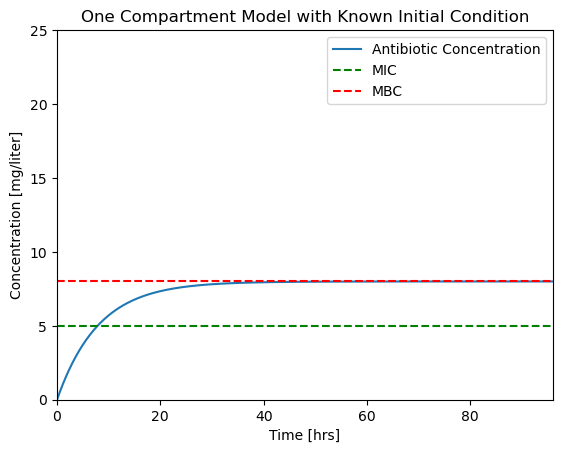

In [7]:
#copying the solution from Problem 1, updating with the solution for tdose

# parameter values
V = 4           # liters
Q = 0.5         # liters/hour
MIC = 5         # mg/liter
MBC = 8         # mg/liter
C_initial = 0   # mg/liter

# differential equation
def deriv(t, C):
    return u(t)/V - (Q/V)*C

# input parameter values
dt = 1           # length of administration for a single dose
tdose = 6.05     # time between doses
Udose = 64       # mg


def u(t):
  return 4    #this is where we insert the steady-state solution

# events
def cross_mbc(t, y):
   return y[0] - MBC
cross_mbc.direction = -1

def cross_mic(t, y):
  return y[0] - MIC
cross_mic.direction = -1

events = [cross_mbc]

# specify time span and evaluation points
t_span = [0, 96]
t_eval = np.linspace(0, 96, 1000)

# initial conditions
C_initial = 0
IC = [C_initial]

#compute solution
soln = solve_ivp(deriv, t_span, IC, events=events, t_eval=t_eval, max_step=0.1)

# display solution
ax = plotConcentration(soln)
for j, event in enumerate(events):
    for k, t in enumerate(soln.t_events[j]):
        ax.plot(t, soln.y_events[j][k][0], 'r.', ms=10)

Note how the steady-state solution has a much longer "ramp time" to get the drug concentration at the MBC level than in the first simulation.